###  Python Basics Tutorial

####  Predictive Model Project Template

####  Machine Learning Mastery with Python
####  Jason Brownlee

In [1]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

# 1. Prepare Problem

## a) Load libraries

In [3]:
from pandas import read_csv

## plotting
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

## model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## model assessment metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## model algo's
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## b) Load dataset

In [5]:
path = 'D:\OneDrive - QJA\My Files\DataScience\DataSets'
filename = 'iris.txt'
names = ['sepal-length', 'sepal-width', 'petal-length', 
         'petal-width', 'class']
df = read_csv(path + '\\' + filename, names = names)

# 2. Summarize Data

In [7]:
print(df.shape); print(df.head(10)); print(df.tail(10))

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width           class
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142       

## a) Descriptive statistics

In [11]:
print(df.describe().T)  # .T or .transpose to transpose df

              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [12]:
## look at numb of observations for each class
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## b) Data visualizations

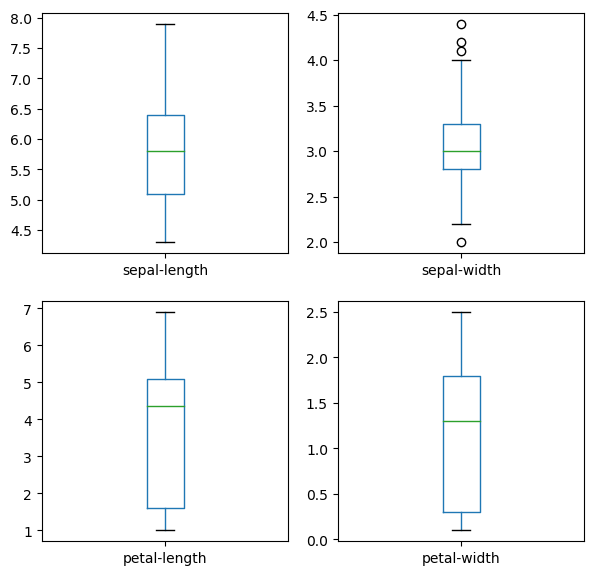

In [44]:
## univariate plots

## will create blox plot for all numerical variables

df.plot(kind = 'box', 
        subplots = True,  # False to put in 1 graph
        layout = (2,2),  # adjust based on numb of vars (default = 1xn)
        sharex = False,   # True to keep each x-axis scale identical
        sharey = False)   # True to keep each y-axis scale identical
pyplot.show()


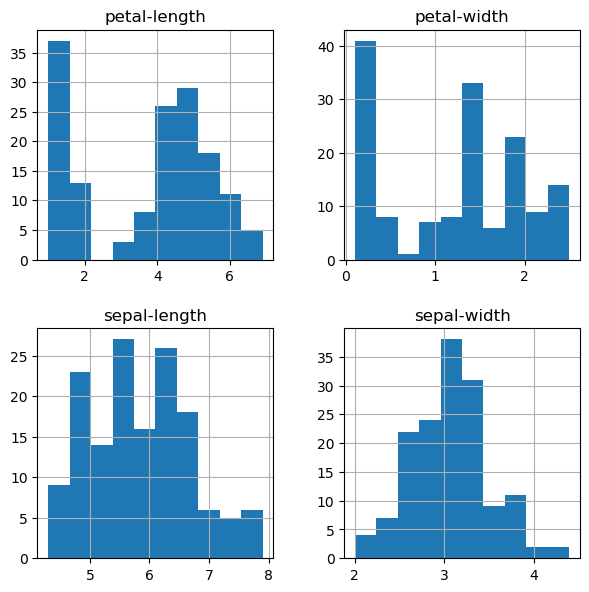

In [43]:
## histogram

pyplot.rcParams['figure.figsize'] = [7, 7]
pyplot.rcParams['figure.dpi'] = 100

df.hist()
pyplot.show()

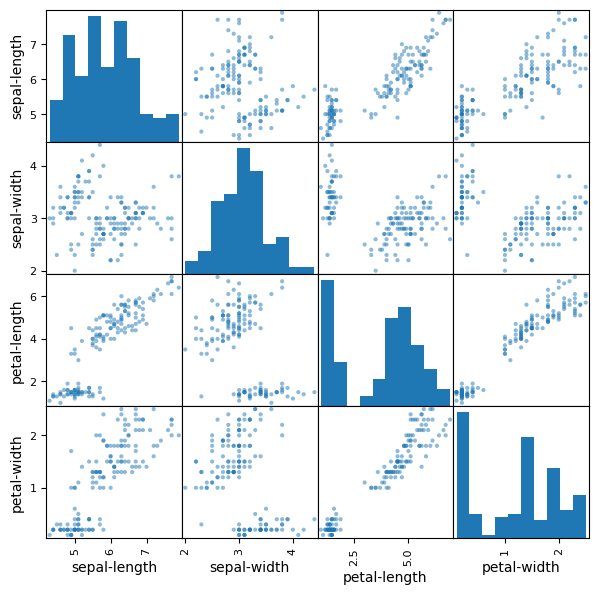

In [45]:
## multivariate plot 
## (interactions between variables)

scatter_matrix(df)
pyplot.show()

# 3. Prepare Data

## a) Data Cleaning

## b) Feature Selection

## c) Data Transforms

# 4. Evaluate Algorithms

## a) Split-out validation dataset

In [51]:
## split df 80% train, 20%test
## NOTE: some algos will use n-fold CV so this test/train
##    split is not always going to be used

array = df.values

X = array[:, 0:4]
Y = array[:, 4]

validation_size = 0.20
seed = 7

X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y,
                                            test_size = validation_size,
                                            random_state = seed)


## b) Test options and evaluation metric

In [52]:
## using 'accuracy' metric to eval models:
##    proportion of correctly predicted obs / total number of obs * 100

## c) Spot Check Algorithms

In [54]:
## since you don't know which algos will work best,
##    consider diverse linear and nonlinear based on 
##    EDA results, (ie: do scatter plots, for example
##    show correlative relatioship that suggests they
##    may be partially linearly seperable in some dims)

## Here we will use:
##   simple linear: LR, LDA
##   nonlinear: KNN, CART, NB, SVM

models = [] # blank list to store model and model specs
models.append(('LR', LogisticRegression(solver = 'liblinear',
                                        multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

results = [] # blank list to store results
names = []  # blank list to store name of each model

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed) # seed specified in split above
    cv_results = cross_val_score(model, X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = 'accuracy') # evaluation metric
    names.append(name)
    msg = '%s: Error: %.4f, Stnd Dev: %.4f' % (name,
                                               cv_results.mean(),
                                               cv_results.std())
    print(msg)

LR: Error: 0.9667, Stnd Dev: 0.0408
LDA: Error: 0.9750, Stnd Dev: 0.0382
KNN: Error: 0.9833, Stnd Dev: 0.0333
CART: Error: 0.9833, Stnd Dev: 0.0333
NB: Error: 0.9750, Stnd Dev: 0.0534
SVM: Error: 0.9917, Stnd Dev: 0.0250


## d) Compare Algorithms

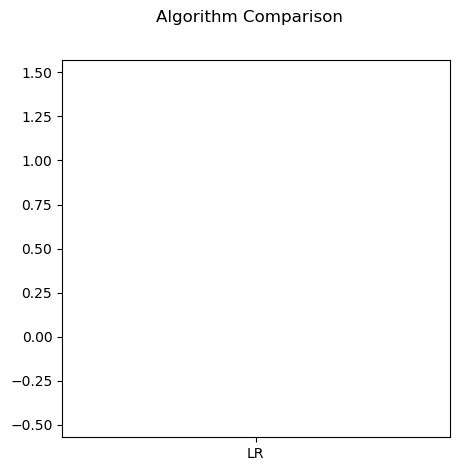

In [60]:
# there is a popluation accuracy measure since each algo was run 10 times
pyplot.rcParams['figure.figsize'] = [5, 5]


fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# 5. Improve Accuracy

## a) Algorithm Tuning

## b) Ensembles

# 6. Finalize Model

## a) Predictions on validation dataset

## b) Create standalone model on entire training dataset

## c) Save model for later use